# [Quantum dynamics of cold trapped ions with application to quantum computation](https://doi.org/10.1007/s003400050373)
D.F.V. James, Appl. Phys. B **66**, 181–190 (1998)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ion_sim import IonSim, init
from pint import UnitRegistry
from math import pi as π

u = UnitRegistry()

In [2]:
m = u('40 amu')
q = u('e')
ωx = 2*π * u('1 MHz')
ωy = 2*π * u('10 MHz')
ωz = 2*π * u('10 MHz')
l = ((q**2/(4*π*u.ε_0 * m * ωx**2))**(1/3)).to_base_units()

class example(IonSim):
    def U(self, x, y, z, t):
        m = self.m
        Ux = (1/2) * m * ωx**2 * x**2
        Uy = (1/2) * m * ωy**2 * y**2
        Uz = (1/2) * m * ωz**2 * z**2
        return (Ux + Uy + Uz).to_base_units().m

## Table 1
Scaled equilibrium position of the trapped ions for different total number of ions.
![iTable 1](images/dfjames_table1.png)
This is obtained by the numerical solutions of
$$
u_m - \sum_{n=1}^{m-1}\frac{1}{(u_m-u_n)^2} + \sum_{n=m+1}^N \frac{1}{(u_m-u_n)^2} = 0.
$$
The length scale is given by
$$
l^3 = \frac{Z^2 e^2}{4\pi\epsilon_0M\nu^2}
$$

In [3]:
ex = example(u)
print(f'{"N":<4} {"Scaled equilibrium positions":^100}')
for N in range(2,11):
    ex.m = m * np.ones(N)
    ex.x0 = init.string(ex, dx=l)
    positions = np.around(np.sort((ex.equilibrium_position() / l).to('dimensionless').m[0,:]), 4)
    pos_str = ('{:^10}'*N).format(*positions)
    print(f'{N:<4} {pos_str:^100}')

N                                        Scaled equilibrium positions                                    
2                                              -0.63      0.63                                           
3                                        -1.0772     0.0      1.0772                                     
4                                   -1.4368   -0.4544    0.4544    1.4368                                
5                              -1.7429   -0.8221     -0.0     0.8221    1.7429                           
6                         -2.0123   -1.1361   -0.3699    0.3699    1.1361    2.0123                      
7                    -2.2545   -1.4129   -0.6869     -0.0     0.6869    1.4129    2.2545                 
8               -2.4758   -1.6621    -0.967    -0.318    0.318     0.967     1.6621    2.4758            
9          -2.6803   -1.8897   -1.2195   -0.5996     -0.0     0.5996    1.2195    1.8897    2.6803       
10    -2.8708   -2.1001   -1.4503   -0.8538   

## Figure 2
The relationship between the number of trapped ions N and the minimum separation. The curve is given by
$$
u_\text{min}(N) \approx \frac{2.018}{N^0.559},
$$
while the points come from the numerical solutions of the the algebraic equation
$$
u_m - \sum_{n=1}^{m-1}\frac{1}{(u_m-u_n)^2} + \sum_{n=m+1}^N \frac{1}{(u_m-u_n)^2} = 0.
$$
![Figure 2](images/dfjames_fig2.png)

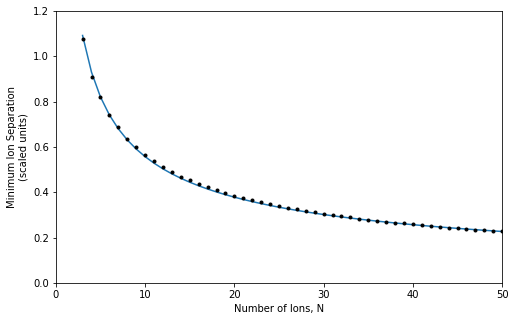

In [4]:
ex = example(u)
def minimum_separation(N):
    ex.m = m * np.ones(N)
    ex.x0 = init.string(ex, dx=l)
    return np.min(np.diff(np.sort((ex.equilibrium_position() / l).to('dimensionless').m[0,:])))

N = np.arange(3,50+1)
y = [minimum_separation(n) for n in N] # takes about 75 seconds to run
u_min = 2.018/N**0.559

plt.figure(figsize=(8,5))
plt.plot(N,u_min)
plt.plot(N,y, 'k.')
plt.xlabel('Number of Ions, N')
plt.ylabel('Minimum Ion Separation\n(scaled units)')
plt.xlim(0,50)
plt.ylim(0,1.2);

## Table 2
Numerically determined eigenvalues and eigenvectors of the matrix $A_{nm}$ for 2 to 6 ions.
![Table 2](images/dfjames_table2_excerpt.png)
The eigenvalues are normalized, and the matrix $A_{nm}$ is defined as
$$
A_{nm} = 
\begin{cases}
1 + 2\sum_{p=1,p\not=m}^N \frac{1}{\left|u_m - u_p\right|^3} & \text{if } n=m, \\
\frac{-2}{\left|u_m - u_n\right|^3} & \text{if } n \not=m.
\end{cases}
$$

In [5]:
ex = example(u)
print(f'{"":<6}{"Eigenvalue":6}  {"Eigenvector"}')
for N in range(2,7):
    ex.m = m * np.ones(N)
    ex.x0 = init.string(ex, dx=l)
    f, b = ex.normal_modes()
    μ = np.around(((2*π*f/ωx)**2).to('dimensionless').m,4)

    for i in range(N):
        print(f'{"N="+str(N) if i==0 else "":<6}{np.around(μ[i],3):=6}      {np.around(b[0,:,i],4)}')
    print('\n')

      Eigenvalue  Eigenvector
N=2      1.0      [0.7071 0.7071]
         3.0      [ 0.7071 -0.7071]


N=3      1.0      [0.5774 0.5774 0.5774]
         3.0      [ 0.7071  0.     -0.7071]
         5.8      [-0.4082  0.8165 -0.4082]


N=4      1.0      [0.5 0.5 0.5 0.5]
         3.0      [-0.6742 -0.2132  0.2132  0.6742]
        5.81      [ 0.5 -0.5 -0.5  0.5]
       9.308      [-0.2132  0.6742 -0.6742  0.2132]


N=5      1.0      [0.4472 0.4472 0.4472 0.4472 0.4472]
         3.0      [-0.6395 -0.3017  0.      0.3017  0.6395]
       5.818      [-0.5377  0.2805  0.5143  0.2805 -0.5377]
       9.332      [-0.3017  0.6395 -0.     -0.6395  0.3017]
      13.475      [ 0.1045 -0.4704  0.7318 -0.4704  0.1045]


N=6      1.0      [0.4082 0.4082 0.4082 0.4082 0.4082 0.4082]
         3.0      [-0.608  -0.3433 -0.1118  0.1118  0.3433  0.608 ]
       5.824      [ 0.5531 -0.1332 -0.4199 -0.4199 -0.1332  0.5531]
       9.352      [ 0.3577 -0.5431 -0.2778  0.2778  0.5431 -0.3577]
      13.514      [-0.